In [1]:
from library_dicom.rtss_processor.model.Instance_RTSS import Instance_RTSS
from library_dicom.rtss_processor.model.Mask_To_RTSS import Mask_To_RTSS
from library_dicom.dicom_processor.model.Series import Series
import matplotlib.pyplot as plt
import numpy as np

In [2]:
CT_path=r'C:\Users\wendy\Documents\STAGE\DicomRT\201802409 BARAT GALPIN ELIANE\103893708 Tepscan FDG\CT CT STD 2.5mm'

### RTSTRUCT file -> Mask 

In [3]:
rtss_path = r'C:\Users\wendy\Documents\STAGE\DicomRT\201802409 BARAT GALPIN ELIANE\103893708 Tepscan FDG\RTSTRUCT PETVCAR RTSS RTSS\RT000000.dcm'

In [4]:
rtss = Instance_RTSS(rtss_path, CT_path)

In [5]:
rtss.matrix_size

[512, 512, 415]

In [6]:
rtss.get_number_of_roi()

10

In [7]:
from time import process_time
t1_start = process_time()
mask_4D = rtss.rtss_to_4D_mask()
t1_stop = process_time() 
print("diff début fin :", t1_stop-t1_start)  

diff début fin : 12.921875


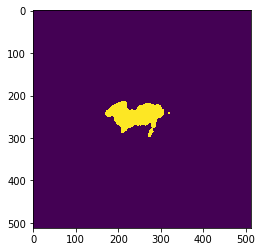

In [8]:
plt.imshow(mask_4D[:,:,308,0]) #0 pour ROI 1
plt.show()
#3Dslicer <= 309 slice |  308 ième => Python 

### Mask -> RTSTRUCT file 


In [ ]:
from library_dicom.rtss_processor.model.RTSS import RTSS
import pydicom

In [ ]:
new_rtss = RTSS('mask', 'filename', CT_path)

#### SET 

In [ ]:
new_rtss.set_ReferencedFrameOfReferenceSequence(frame_of_reference_uid, study_instance_uid,  serie_instance_uid, referenced_sop_class_uid, list_all_uid)

#### set StructureSetROISequence, set for each ROI 

In [ ]:
for number_roi in range(1,11):
    
    new_rtss.set_StructureSetROISequence(number_roi, frame_of_reference_uid, 'ROIName', 'ROIDescription', 100000, 'SEMI-AUTOMATIC')

#### set ROIContourSequence, loop on each ROI


In [ ]:
list_all_uid = serie_CT.get_all_SOPInstanceIUD()

number_of_roi = mask_4D.shape[3]
mask_to_roi = Mask_To_RTSS(mask_4D)

for number_roi in range(1, number_of_roi +1):
    contours, referenced_instance_UID = mask_to_roi.pixel_to_spatial(number_roi, [-300.0, -300.0, 325.0], [1.171875, 1.171875, -2.5], list_all_uid)
    new_rtss.set_ROIContourSequence(number_roi, [0,0,255], referenced_sop_class_uid,  referenced_instance_UID, 'CLOSED_PLANAR',  contours)
    

#### set RTROIObservationsSequence, set for each ROI 

In [ ]:
for number_roi in range(1,11):
    

    new_rtss.set_RTROIObservationSequence(number_roi, number_roi, 'ROIObservationLabel', 'RTROIInterpretedType')

### Save New RTSTRUCT

In [ ]:
import os 
new_rtss_directory = r'C:\Users\wendy\Documents\STAGE\DicomRT\201802409 BARAT GALPIN ELIANE\103893708 Tepscan FDG\new_rtss'
filename = r'RT1.dcm'


In [ ]:
os.path.join(new_rtss_directory, filename)

In [ ]:
new_rtss.save_as(os.path.join(new_rtss_directory, filename))

In [ ]:
dicom_rt =  pydicom.dcmread(os.path.join(new_rtss_directory, filename))

In [ ]:
dicom_rt.ROIContourSequence[1]

In [ ]:
import pydicom

In [ ]:
path =r'C:\Users\wendy\Documents\STAGE\DicomRT\201802409 BARAT GALPIN ELIANE\103893708 Tepscan FDG\new_rtss\RT0.dcm'

In [ ]:
pydicom.dcmread(path)

In [ ]:
rtss = pydicom.dcmread(r'C:\Users\wendy\Documents\STAGE\DicomRT\201802409 BARAT GALPIN ELIANE\103893708 Tepscan FDG\RTSTRUCT PETVCAR RTSS RTSS\RT000000.dcm')

In [ ]:
rtss